Initial commands

In [1]:
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf') #setting figure format to vector when exported
from scipy import stats
import numpy as np
dpiValue=500 #is used for figures in the entire document
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True

# Car or goat

In [2]:
listlength=10000 #number of simulations
start=1 #1=goat, 2=goat, 3=car
end=3
randlist=[random.randrange(start,end+1) for i in range(listlength)] #list of random integers 1,2 or 3

Calculating the probability if not changing the decision

In [3]:
goat=0
car=0
for i in range(len(randlist)):
    if randlist[i]==1: #behind the first door is a goat
        goat=goat+1
    if randlist[i]==2: #behind the second door is a goat
        goat=goat+1
    if randlist[i]==3: #behind the third door is a car
        car=car +1

pgoat=goat/listlength
pcar=car/listlength

print('Probability that there is a goat behind the door, if not changing the decision, is: {:.3f}'.format(pgoat)+'.')
print('Probability that there is a car behind the door, if not changing the decision, is: {:.3f}'.format(pcar)+'.')

Probability that there is a goat behind the door, if not changing the decision, is: 0.673.
Probability that there is a car behind the door, if not changing the decision, is: 0.327.


Calculating the probability if changing the decision

In [4]:
goat=0
car=0
for i in range(len(randlist)):
    if randlist[i]==1: #instead of first door choosing the third (car)
        car=car+1 
    if randlist[i]==2: #instead of second door choosing the third(car)
        car=car+1
    if randlist[i]==3: #instead of second door choosing the first (car)
        goat=goat +1

pgoat=goat/listlength
pcar=car/listlength

print('Probability that there is a goat behind the door, if changing the decision, is: {:.3f}'.format(pgoat)+'.')
print('Probability that there is a car behind the door, if changing the decision, is: {:.3f}'.format(pcar)+'.')

Probability that there is a goat behind the door, if changing the decision, is: 0.327.
Probability that there is a car behind the door, if changing the decision, is: 0.673.


# Birthday problem

In [5]:
listlength=10000 #number of simulations
ndays=365 #number of days in year
n=25 #my age
start=1
end=365

ss=0
for c in range(listlength):
    s=0 
    randlist=[random.randrange(start,end+1) for i in range(n)] #list of n birthdays in one year
    for d in range(len(randlist)): 
        for e in range(len(randlist)):
            if randlist[d]==randlist[e]: 
                s=s+1  
    s=(s-n)/2 #s is always at least=n, therefore s should be modified
    if s>=1: #if s is equal og greater than 1, then at least two persons share birthday
        ss=ss+1
pbirthday=ss/(listlength)
print('Probability that at least two persons in a class have the same birthday is: {:.3f}'.format(pbirthday)+'.')

Probability that at least two persons in a class have the same birthday is: 0.552.


# The Cliff-Hanger

## Simulations considering uniform distribution (p=0.5), starting on the cliff (k=1)

Probability of reaching home, if starting from the cliff (k=1) is 0.037.
Probability of falling from the cliff, if starting from the cliff (k=1) is 0.963.


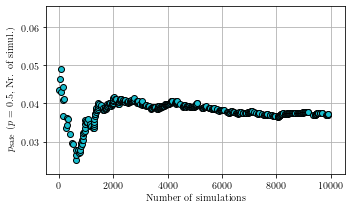

In [6]:
listlength=10000 #number of simulations 
stepshome=25 #my age -> steps between the cliff and the house 

fall=0
home=0

plt.figure(figsize=(12 /2.54,7/2.54))

plt.xlabel('Number of simulations')
plt.ylabel('$p_{\mathrm{safe}}$ ($p$ = 0.5, Nr. of simul.)') #mathrm creates subscript non-italic
plt.grid()
for d in range(listlength):
    i=0
    steps=[]
    stepspathlength=[]
    while True:
        step=random.choice([-1,1]) #either goes toward the cliff (-1) or away from the cliff (1); this corresponds to the p=0.5 
        steps.append(step)
        stepspathlength.append(np.sum([steps[0:i+1]])) #current position
        if stepspathlength[i]==stepshome:
            stepsnr=i+1
            home=home+1
            plt.scatter(d,home/d,color='tab:cyan',edgecolor='black',zorder=3) #with 'zorder' you control the position of gridlines (behind statter points)
            break
        if stepspathlength[i]<0: #a man falls if he is at the cliff and takes step toward the cliff (step = -1), either in first try or in the i'th try
            fall=fall+1
            break
        i=i+1
plt.tight_layout(pad=0.1)
plt.savefig('Cliff_Hanger_1.png',dpi=dpiValue,figsize=(12/2.54,7/2.54))
phome=home/listlength
pfall=fall/listlength

print('Probability of reaching home, if starting from the cliff (k=1) is {:.3f}'.format(phome)+'.')
print('Probability of falling from the cliff, if starting from the cliff (k=1) is {:.3f}'.format(pfall)+'.')

## Simulations considering different distributions (different p's), starting on the cliff (k=1)

Probability of reaching home, if starting from the cliff (k=1) with probability p = 0.100 is 0.880.
Probability of reaching home, if starting from the cliff (k=1) with probability p = 0.200 is 0.741.
Probability of reaching home, if starting from the cliff (k=1) with probability p = 0.300 is 0.574.
Probability of reaching home, if starting from the cliff (k=1) with probability p = 0.400 is 0.320.
Probability of reaching home, if starting from the cliff (k=1) with probability p = 0.500 is 0.034.
Probability of reaching home, if starting from the cliff (k=1) with probability p = 0.600 is 0.000.
Probability of reaching home, if starting from the cliff (k=1) with probability p = 0.700 is 0.000.
Probability of reaching home, if starting from the cliff (k=1) with probability p = 0.800 is 0.000.
Probability of reaching home, if starting from the cliff (k=1) with probability p = 0.900 is 0.000.


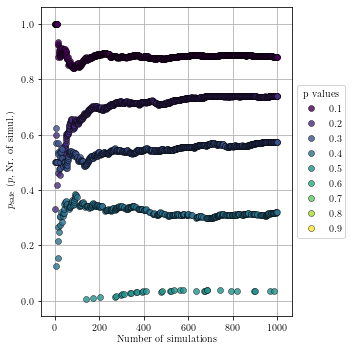

In [7]:
listlength=1000 #number of simulations for every p    
stepshome=25 #my age -> steps between the cliff and the house 

plist=np.linspace(0.1,0.9,9) #list of probabilities of takinh a step towards the cliff
viridis = cm.get_cmap('viridis', 9) #color map for plotting
legendEntries=[] #for legend of the plot

plt.figure(figsize=(12/2.54,12/2.54))
plt.xlabel('Number of simulations')
plt.ylabel('$p_{\mathrm{safe}}$ ($p$, Nr. of simul.)') #mathrm creates subscript non-italic
plt.grid()

for i in range(len(plist)):
    p=plist[i]#probability of taking a step towards the cliff
    xk=[-1,1] #values xk that random variable X can obtain
    pk=[p,1-p] #corresponding probabilities pk(xk)
    fall=0
    home=0
    for j in range(listlength):
        k=0 #should not be confussed with k as indicator of initial steps away from the cliff
        steps=[]
        stepspathlength=[]
        while True:
            custm=stats.rv_discrete(values=(xk, pk)) #constructing a distribution
            R=custm.rvs(size=1) #generating random variables according to predefined distribution
            step=R[0] #each step is a random variable
            steps.append(step)
            stepspathlength.append(np.sum([steps[0:k+1]])) #current position
            if stepspathlength[k]==stepshome:
                stepsnr=k+1
                home=home+1
                scatter=plt.scatter(j+1,home/(j+1),color=viridis(plist[i]),edgecolor='black',linewidth=0.5,alpha=0.8,zorder=3)
                break
            if stepspathlength[k]<0: #a man falls if he is at the cliff and takes step toward the cliff (step = -1), either in first try or in the i'th try
                fall=fall+1
                break
            k=k+1
    phome=home/listlength
    print('Probability of reaching home, if starting from the cliff (k=1) with probability p = {:.3f}'.format(p)+' is {:.3f}'.format(phome)+'.')
    legendEntries.append(Line2D([0], [0],linestyle='',marker='o',markerfacecolor=viridis(plist[i]),
                                markeredgecolor='black',markeredgewidth=0.5,alpha=0.8))
plt.legend(legendEntries,np.round(plist,1),title='p values',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(pad=0.1)
plt.savefig('Cliff_Hanger_2.png',dpi=dpiValue,figsize=(12/2.54,12/2.54))

## Theoretically

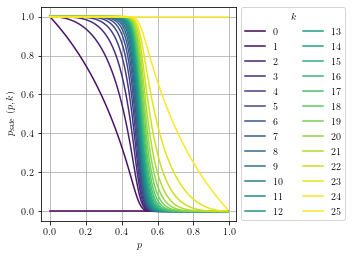

In [8]:
n=25 #my age -> steps between the cliff and the house 

plt.figure(figsize=(12/2.54,9/2.54))
plt.xlabel('$p$')
plt.ylabel('$p_{\mathrm{safe}}$ ($p, k$)') #mathrm creates subscript non-italic
plt.grid()
viridis = cm.get_cmap('viridis', n) #colormap for plotting
plist=np.linspace(0,0.99,100)
klist=np.linspace(0,n,n+1) #k is number of steps between cliff and start point
for i in range(len(klist)):
    j=klist[i]
    psafe=[]
    for k in range(len(plist)):
        p=plist[k]
        q=1-p
        if p==0.5:
            psafe.append(j/(n))
        else:
            psafe.append((1-(p/q)**j)/(1-(p/q)**n))
    plt.plot(plist,psafe,label=int(j),color=viridis(i),zorder=3)
    plt.legend(title='$k$',loc='center left', bbox_to_anchor=(1, 0.5),ncol=2)   
plt.tight_layout(pad=0.1)
plt.savefig('Cliff_Hanger_theoretically.png',dpi=dpiValue,figsize=(12/2.54,9/2.54)) 
